In [16]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import shutil
from PIL import Image


#### Data Directory


In [2]:
# folder path
data_folder = 'SolarPanelSoilingImageDataset\Solar_Panel_Soiling_Image_dataset\PanelImages_originaldata/'

files = os.listdir(data_folder)

files[0:10]


['solar_Fri_Jun_16_10__0__11_2017_L_0.906153208302_I_0.321592156863.jpg',
 'solar_Fri_Jun_16_10__0__16_2017_L_0.903081697073_I_0.293192156863.jpg',
 'solar_Fri_Jun_16_10__0__1_2017_L_0.916698044034_I_0.39577254902.jpg',
 'solar_Fri_Jun_16_10__0__21_2017_L_0.903081697073_I_0.293192156863.jpg',
 'solar_Fri_Jun_16_10__0__26_2017_L_0.896087391118_I_0.27462745098.jpg',
 'solar_Fri_Jun_16_10__0__31_2017_L_0.896087391118_I_0.27462745098.jpg',
 'solar_Fri_Jun_16_10__0__36_2017_L_0.894974574172_I_0.269141176471.jpg',
 'solar_Fri_Jun_16_10__0__41_2017_L_0.894974574172_I_0.269141176471.jpg',
 'solar_Fri_Jun_16_10__0__46_2017_L_0.890988502987_I_0.261278431373.jpg',
 'solar_Fri_Jun_16_10__0__51_2017_L_0.890988502987_I_0.261278431373.jpg']

### Preprocessing

#### Breaking down string into time component columns


In [3]:
examples = []
for file in files:
    parts = file.split('_')
    solar_data = {
        'type': parts[0], # 'solar'
        'day_of_week': parts[1], # day of the week
        'month': parts[2],
        'day': parts[3], # day
        'hour': parts[4], # hout
        'minute': parts[6], # minute
        'second': parts[8], # second
        'year': parts[9], # 'year'
        'loss_percentage': parts[11], # 'ageloss' with 'L%' removed
        'irradiance_level': parts[13][0:-4], # 'irradiancelevel' with 'I' removed
        'original_title': file,
    }
    examples.append(solar_data)

df = pd.DataFrame(examples)


In [4]:
df

,type,day_of_week,month,day,hour,minute,second,year,loss_percentage,irradiance_level,original_title
0,solar,Fri,Jun,16,10,0,11,2017,0.906153208302,0.321592156863,solar_Fri_Jun_16_10__0__11_2017_L_0.9061532083...
1,solar,Fri,Jun,16,10,0,16,2017,0.903081697073,0.293192156863,solar_Fri_Jun_16_10__0__16_2017_L_0.9030816970...
2,solar,Fri,Jun,16,10,0,1,2017,0.916698044034,0.39577254902,solar_Fri_Jun_16_10__0__1_2017_L_0.91669804403...
3,solar,Fri,Jun,16,10,0,21,2017,0.903081697073,0.293192156863,solar_Fri_Jun_16_10__0__21_2017_L_0.9030816970...
4,solar,Fri,Jun,16,10,0,26,2017,0.896087391118,0.27462745098,solar_Fri_Jun_16_10__0__26_2017_L_0.8960873911...
...,...,...,...,...,...,...,...,...,...,...,...
45749,solar,Wed,Jun,28,7,9,44,2017,0.0067850003029,0.0647333333333,solar_Wed_Jun_28_7__9__44_2017_L_0.00678500030...
45750,solar,Wed,Jun,28,7,9,49,2017,0.0067850003029,0.0647333333333,solar_Wed_Jun_28_7__9__49_2017_L_0.00678500030...
45751,solar,Wed,Jun,28,7,9,54,2017,0.0210669184468,0.0664549019608,solar_Wed_Jun_28_7__9__54_2017_L_0.02106691844...
45752,solar,Wed,Jun,28,7,9,59,2017,0.0210669184468,0.0664549019608,solar_Wed_Jun_28_7__9__59_2017_L_0.02106691844...


#### Drop unnecessary Columns

In [5]:
# List of columns to drop
columns_to_drop = ['type', 'day_of_week']

# Dropping the specified columns
df = df.drop(columns=columns_to_drop)

#### Month Mapping

In [6]:
# Month name to numerical mapping
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

df['month'] = df['month'].map(month_mapping)


#### Convert dtypes to numeric

In [7]:
columns_to_convert = ['day', 'hour', 'minute', 'second', 'year', 'loss_percentage', 'irradiance_level']

# Loop through each column and convert to numeric
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')


### Visualizations

#### Max Value and minimum value Per atribute


In [8]:
max_loss_percentage = df['loss_percentage'].max()
min_loss_percentage = df['loss_percentage'].min()

max_irradiance_level = df['irradiance_level'].max()
min_irradiance_level = df['irradiance_level'].min()

print("Max Loss Percentage:", max_loss_percentage)
print("Min Loss Percentage:", min_loss_percentage)
print("Max Irradiance Level:", max_irradiance_level)
print("Min Irradiance Level:", min_irradiance_level)

Max Loss Percentage: 0.996158869171
Min Loss Percentage: 0.0
Max Irradiance Level: 1.0061254902
Min Irradiance Level: 0.00268235294118


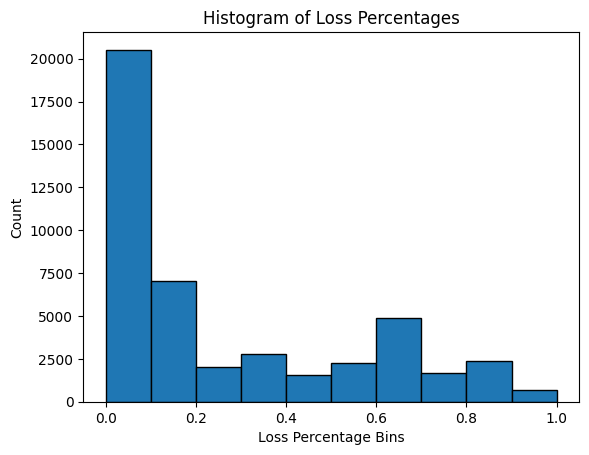

Bin 0.0 - 0.1: 20523 counts
Bin 0.1 - 0.2: 7014 counts
Bin 0.2 - 0.3: 2045 counts
Bin 0.3 - 0.4: 2799 counts
Bin 0.4 - 0.5: 1542 counts
Bin 0.5 - 0.6: 2232 counts
Bin 0.6 - 0.7: 4899 counts
Bin 0.7 - 0.8: 1671 counts
Bin 0.8 - 0.9: 2369 counts
Bin 0.9 - 1.0: 660 counts


In [9]:
# Set the bin width
bin_width = 0.1

# Create bins from 0 to 1 with a step of bin_width
bins = np.arange(0, 1.1, bin_width)

# Count occurrences in each bin
hist, bin_edges = np.histogram(df['loss_percentage'], bins=bins)

# Visualize the histogram
plt.bar(bins[:-1], hist, width=bin_width, align='edge', edgecolor='black')
plt.xlabel('Loss Percentage Bins')
plt.ylabel('Count')
plt.title('Histogram of Loss Percentages')
plt.show()

# Display the results
for i in range(len(hist)):
    print(f"Bin {bins[i]:.1f} - {bins[i+1]:.1f}: {hist[i]} counts")

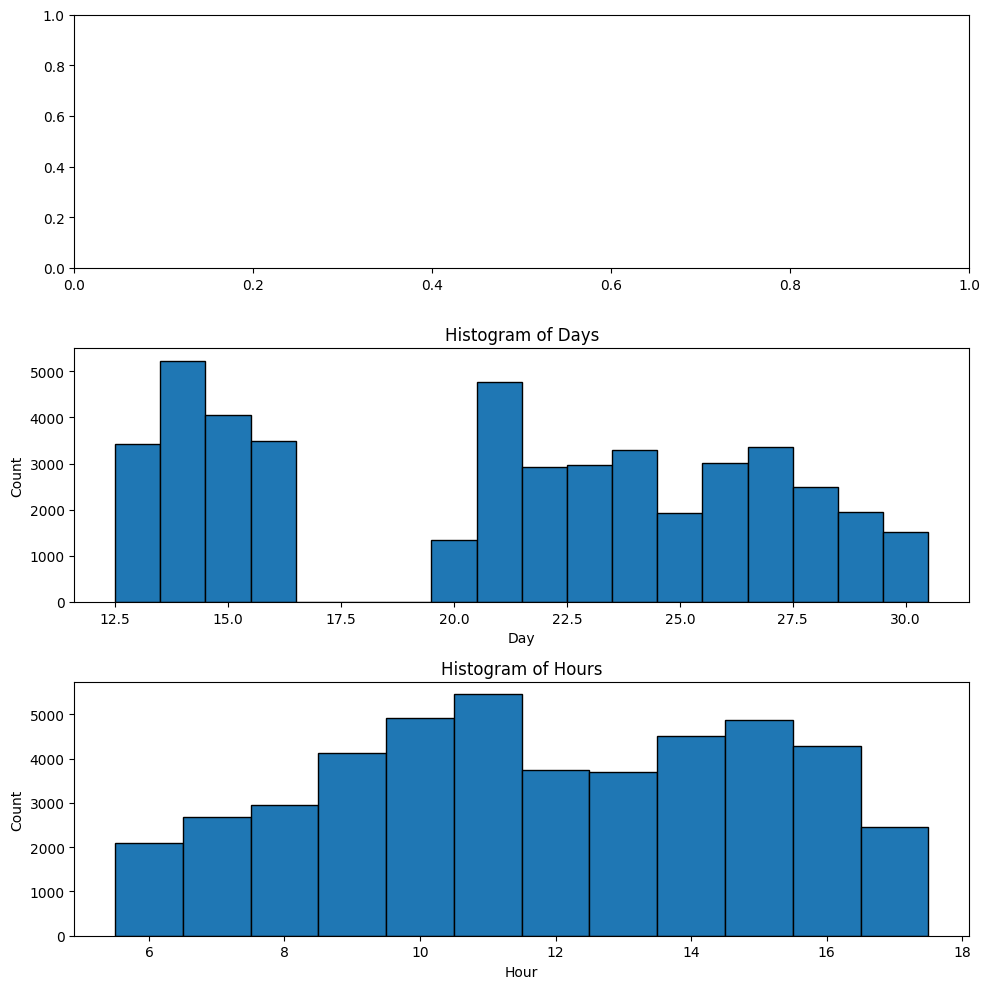

In [10]:
month_bin_width = 1
day_bin_width = 1
hour_bin_width = 1

# Create histograms for month, day, and hour
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))



# Day histogram
axes[1].hist(df['day'], bins=np.arange(df['day'].min() - 0.5, df['day'].max() + 1.5, day_bin_width), edgecolor='black')
axes[1].set_title('Histogram of Days')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Count')

# Hour histogram
axes[2].hist(df['hour'], bins=np.arange(df['hour'].min() - 0.5, df['hour'].max() + 1.5, hour_bin_width), edgecolor='black')
axes[2].set_title('Histogram of Hours')
axes[2].set_xlabel('Hour')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

#### Ordering the dataframe per timestamp

In [11]:
df['timestamp'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']])

df = df.sort_values(by='timestamp')

df = df.reset_index(drop=True)


In [12]:
df

,month,day,hour,minute,second,year,loss_percentage,irradiance_level,original_title,timestamp
0,6,13,9,46,49,2017,0.047484,0.296733,solar_Tue_Jun_13_9__46__49_2017_L_0.0474843723...,2017-06-13 09:46:49
1,6,13,9,46,54,2017,0.027331,0.288831,solar_Tue_Jun_13_9__46__54_2017_L_0.0273312333...,2017-06-13 09:46:54
2,6,13,9,46,59,2017,0.027331,0.288831,solar_Tue_Jun_13_9__46__59_2017_L_0.0273312333...,2017-06-13 09:46:59
3,6,13,9,47,4,2017,0.039799,0.300631,solar_Tue_Jun_13_9__47__4_2017_L_0.03979859380...,2017-06-13 09:47:04
4,6,13,9,47,9,2017,0.039799,0.300631,solar_Tue_Jun_13_9__47__9_2017_L_0.03979859380...,2017-06-13 09:47:09
...,...,...,...,...,...,...,...,...,...,...
45749,6,30,15,53,27,2017,0.567408,0.243176,solar_Fri_Jun_30_15__53__27_2017_L_0.567408482...,2017-06-30 15:53:27
45750,6,30,15,53,32,2017,0.567408,0.243176,solar_Fri_Jun_30_15__53__32_2017_L_0.567408482...,2017-06-30 15:53:32
45751,6,30,15,54,7,2017,0.565741,0.291667,solar_Fri_Jun_30_15__54__7_2017_L_0.5657411764...,2017-06-30 15:54:07
45752,6,30,15,54,12,2017,0.565741,0.291667,solar_Fri_Jun_30_15__54__12_2017_L_0.565741176...,2017-06-30 15:54:12


#### Preprocessing to drop any photos that happen within a range of 30 seconds

In [13]:
df_copy = df.copy()

# Initialize a list to store the indices to keep
indices_to_keep = [df.index[0]]

# Iterate through the DataFrame and keep rows that are more than 20 seconds apart
for i in range(1, len(df)):
    time_difference = (df['timestamp'].iloc[i] - df['timestamp'].iloc[indices_to_keep[-1]]).seconds
    if time_difference > 30:
        indices_to_keep.append(i)

# Filter the DataFrame based on the selected indices
filtered_df = df.loc[indices_to_keep]

# Drop the timestamp column if you don't need it in the final result
filtered_df = filtered_df.drop(columns='timestamp')

# Print the result
filtered_df

,month,day,hour,minute,second,year,loss_percentage,irradiance_level,original_title
0,6,13,9,46,49,2017,0.047484,0.296733,solar_Tue_Jun_13_9__46__49_2017_L_0.0474843723...
5,6,13,9,47,54,2017,0.021836,0.613851,solar_Tue_Jun_13_9__47__54_2017_L_0.0218357907...
9,6,13,9,48,30,2017,0.170606,0.601502,solar_Tue_Jun_13_9__48__30_2017_L_0.1706056081...
12,6,13,9,49,36,2017,0.449538,0.652835,solar_Tue_Jun_13_9__49__36_2017_L_0.4495383635...
15,6,13,9,50,16,2017,0.125192,0.340373,solar_Tue_Jun_13_9__50__16_2017_L_0.1251915432...
...,...,...,...,...,...,...,...,...,...
45734,6,30,15,36,21,2017,0.557657,0.336471,solar_Fri_Jun_30_15__36__21_2017_L_0.557657342...
45741,6,30,15,36,56,2017,0.570072,0.300616,solar_Fri_Jun_30_15__36__56_2017_L_0.570071878...
45745,6,30,15,53,7,2017,0.559479,0.226212,solar_Fri_Jun_30_15__53__7_2017_L_0.5594792316...
45751,6,30,15,54,7,2017,0.565741,0.291667,solar_Fri_Jun_30_15__54__7_2017_L_0.5657411764...


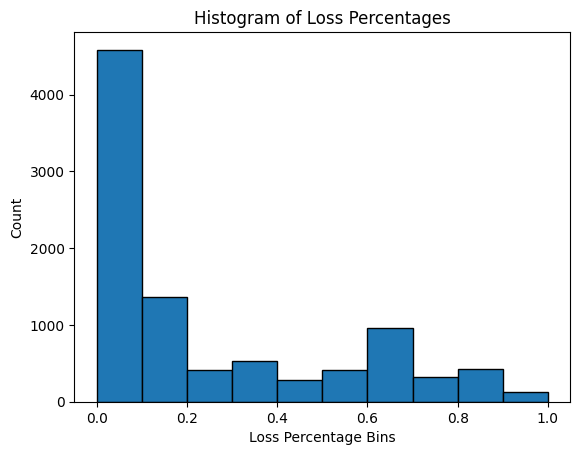

Bin 0.0 - 0.1: 4586 counts
Bin 0.1 - 0.2: 1367 counts
Bin 0.2 - 0.3: 408 counts
Bin 0.3 - 0.4: 532 counts
Bin 0.4 - 0.5: 280 counts
Bin 0.5 - 0.6: 415 counts
Bin 0.6 - 0.7: 958 counts
Bin 0.7 - 0.8: 318 counts
Bin 0.8 - 0.9: 422 counts
Bin 0.9 - 1.0: 129 counts


In [14]:
# Set the bin width
bin_width = 0.1

# Create bins from 0 to 1 with a step of bin_width
bins = np.arange(0, 1.1, bin_width)

# Count occurrences in each bin
hist, bin_edges = np.histogram(filtered_df['loss_percentage'], bins=bins)

# Visualize the histogram
plt.bar(bins[:-1], hist, width=bin_width, align='edge', edgecolor='black')
plt.xlabel('Loss Percentage Bins')
plt.ylabel('Count')
plt.title('Histogram of Loss Percentages')
plt.show()

# Display the results
for i in range(len(hist)):
    print(f"Bin {bins[i]:.1f} - {bins[i+1]:.1f}: {hist[i]} counts")

### Create new folder with images for deep Learning

#### Don't RUN !!!

In [15]:
# Assuming you have a DataFrame named df with a column 'original_title'
data_folder = 'SolarPanelSoilingImageDataset\Solar_Panel_Soiling_Image_dataset\PanelImages_originaldata/'
new_folder = 'SolarPanelSoilingImageDataset\Solar_Panel_Soiling_Image_dataset\Pytorch_data/'

# Create the new folder if it doesn't exist
os.makedirs(new_folder, exist_ok=True)

# Iterate through the DataFrame and copy the selected images to the new folder
for index, row in filtered_df.iterrows():
    original_title = row['original_title']
    old_path = os.path.join(data_folder, original_title)
    new_path = os.path.join(new_folder, original_title)

    try:
        shutil.copy(old_path, new_path)
#       print(f"Copying {original_title} to {new_folder}")
    except FileNotFoundError:
        print(f"File {original_title} not found in {data_folder}")


print("Copying completed.")

Copying completed.


In [17]:
image_count = 0
total_width = 0
total_height = 0

for filename in os.listdir('SolarPanelSoilingImageDataset\Solar_Panel_Soiling_Image_dataset\Pytorch_data/'):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_count += 1
        image = Image.open(os.path.join('SolarPanelSoilingImageDataset\Solar_Panel_Soiling_Image_dataset\Pytorch_data/', filename))
        width, height = image.size
        total_width += width
        total_height += height

average_width = total_width / image_count
average_height = total_height / image_count

print("Number of images:", image_count)
print("Average width:", average_width)
print("Average height:", average_height)

Number of images: 9415
Average width: 192.0
Average height: 192.0


#### Export pandas dataframe to csv

In [50]:
# filtered_df.to_csv('filtered_data.csv', index=False)
